In [1]:
# Dependencies
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from fractions import Fraction
from matplotlib.patches import Polygon

In [2]:
#import csv (includes MovieData.csv and API data)
combined_df = pd.read_csv("Resources/api_merge_df.csv")
combined_df

,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%


In [3]:
combined_df.dtypes

movie_name                   object
Country                      object
Release Date                 object
IMDB Rating                 float64
Metascore                   float64
TomatoMeter                  object
production_budget             int64
domestic_box_office           int64
international_box_office      int64
rating                       object
genre                        object
Total Box Office              int64
ROI                          object
dtype: object

In [4]:
combined_df.count()

movie_name                  1800
Country                     1800
Release Date                1800
IMDB Rating                 1800
Metascore                   1729
TomatoMeter                 1800
production_budget           1800
domestic_box_office         1800
international_box_office    1800
rating                      1800
genre                       1800
Total Box Office            1800
ROI                         1800
dtype: int64

In [5]:
#metascore showing N/A values, evening row count
cleaned_df = combined_df.dropna()

In [6]:
#converting metascore to 0.0/10 
#cleaned_df["Metascore"] = (cleaned_df["Metascore"]*.1).round(1)
#cleaned_df

In [7]:
#imdb ratings to list 
imdb_rating = cleaned_df["IMDB Rating"].to_list()
imdb_rating

[5.2,
 6.4,
 6.8,
 6.7,
 6.2,
 5.5,
 6.2,
 7.3,
 5.4,
 6.8,
 6.3,
 6.9,
 6.9,
 6.5,
 7.0,
 7.0,
 7.9,
 7.5,
 6.7,
 7.0,
 5.1,
 7.3,
 6.3,
 4.7,
 7.3,
 6.1,
 5.5,
 5.1,
 6.5,
 8.2,
 5.8,
 7.6,
 7.6,
 5.0,
 5.0,
 6.4,
 5.4,
 3.3,
 6.1,
 7.4,
 6.3,
 7.5,
 6.7,
 7.0,
 7.5,
 2.8,
 7.3,
 5.1,
 6.1,
 5.9,
 2.8,
 5.3,
 6.4,
 6.2,
 7.1,
 7.4,
 5.1,
 4.8,
 7.1,
 5.3,
 2.9,
 7.5,
 6.3,
 6.5,
 5.8,
 7.7,
 7.4,
 5.4,
 6.9,
 6.9,
 7.5,
 4.4,
 5.1,
 6.0,
 6.0,
 7.1,
 7.1,
 6.6,
 7.2,
 5.8,
 6.0,
 5.4,
 6.7,
 7.2,
 6.8,
 5.5,
 6.9,
 4.4,
 7.0,
 6.4,
 4.7,
 5.1,
 7.3,
 6.8,
 5.1,
 7.8,
 7.1,
 8.5,
 6.5,
 6.7,
 5.8,
 7.0,
 6.5,
 6.6,
 4.5,
 5.6,
 6.5,
 8.2,
 7.6,
 5.8,
 5.0,
 5.6,
 5.8,
 7.0,
 5.6,
 5.5,
 8.0,
 6.2,
 4.4,
 5.6,
 6.5,
 6.1,
 7.5,
 4.4,
 7.1,
 5.9,
 6.9,
 4.4,
 6.6,
 6.8,
 6.6,
 5.5,
 6.5,
 7.9,
 5.7,
 5.3,
 6.4,
 6.3,
 6.4,
 6.9,
 6.0,
 6.1,
 8.5,
 8.0,
 5.1,
 8.0,
 6.4,
 6.6,
 6.0,
 6.6,
 6.9,
 6.1,
 5.7,
 6.7,
 7.3,
 6.0,
 5.9,
 7.3,
 5.3,
 6.5,
 5.9,
 6.6,
 5.8,
 6.4,
 6.3,
 5.8,
 5.9

In [8]:
#metascore ratings to list
#metascore = combined_df["Metascore"].to_list()

In [9]:
#metascore to df
cleaned_df["MetaScore"] = (cleaned_df["Metascore"]*.1).round(1)
cleaned_df

<ipython-input-9-37e027379e16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["MetaScore"] = (cleaned_df["Metascore"]*.1).round(1)


,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,MetaScore
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%,4.5
1,Krrish,India,23 Jun 2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%,6.8
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%,4.5
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%,7.5
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%,4.9
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%,6.1
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%,8.4
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%,6.0


In [10]:
#metascore to list
metascore = (metascore_round).to_list()
metascore

NameError: name 'metascore_round' is not defined

In [11]:
cleaned_df["TomatoMeter"] = cleaned_df["TomatoMeter"].replace('%','',regex=True)
cleaned_df

<ipython-input-11-f8661a4e36d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["TomatoMeter"] = cleaned_df["TomatoMeter"].replace('%','',regex=True)


,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,MetaScore
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%,4.5
1,Krrish,India,23 Jun 2006,6.4,68.0,88,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%,6.8
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41,10000000,11748661,175380,PG-13,Drama,11924041,119.24%,4.5
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%,7.5
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28,10000000,80238724,83638091,R,Horror,163876815,1638.77%,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%,4.9
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%,6.1
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88,50000000,103678298,47511103,R,Drama,151189401,302.38%,8.4
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%,6.0


In [12]:
cleaned_df["TomatoMeter"] = cleaned_df["TomatoMeter"].apply(pd.eval)
cleaned_df

<ipython-input-12-f48e2c8b68ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["TomatoMeter"] = cleaned_df["TomatoMeter"].apply(pd.eval)


,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,MetaScore
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,26.0,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%,4.5
1,Krrish,India,23 Jun 2006,6.4,68.0,88.0,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%,6.8
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,41.0,10000000,11748661,175380,PG-13,Drama,11924041,119.24%,4.5
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,81.0,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%,7.5
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,28.0,10000000,80238724,83638091,R,Horror,163876815,1638.77%,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,79.0,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%,4.9
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,65.0,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%,6.1
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,88.0,50000000,103678298,47511103,R,Drama,151189401,302.38%,8.4
1798,Creed II,USA,21 Nov 2018,7.3,60.0,97.0,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%,6.0


In [13]:
cleaned_df["TomatoMeter"] = (cleaned_df["TomatoMeter"]*.1).to_list()
cleaned_df

<ipython-input-13-716008986689>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["TomatoMeter"] = (cleaned_df["TomatoMeter"]*.1).to_list()


,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,MetaScore
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,2.6,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%,4.5
1,Krrish,India,23 Jun 2006,6.4,68.0,8.8,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%,6.8
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,4.1,10000000,11748661,175380,PG-13,Drama,11924041,119.24%,4.5
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,8.1,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%,7.5
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,2.8,10000000,80238724,83638091,R,Horror,163876815,1638.77%,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,7.9,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%,4.9
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,6.5,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%,6.1
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,8.8,50000000,103678298,47511103,R,Drama,151189401,302.38%,8.4
1798,Creed II,USA,21 Nov 2018,7.3,60.0,9.7,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%,6.0


In [14]:
cleaned_df["ROI"] = cleaned_df["ROI"].replace('%','',regex=True)
cleaned_df

<ipython-input-14-e9904bb33439>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["ROI"] = cleaned_df["ROI"].replace('%','',regex=True)


,movie_name,Country,Release Date,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,MetaScore
0,Madea's Family Reunion,USA,24 Feb 2006,5.2,45.0,2.6,10000000,63257940,62581,PG-13,Comedy,63320521,633.21,4.5
1,Krrish,India,23 Jun 2006,6.4,68.0,8.8,10000000,1430721,31000000,Not Rated,Action,32430721,324.31,6.8
2,End of the Spear,USA,20 Jan 2006,6.8,45.0,4.1,10000000,11748661,175380,PG-13,Drama,11924041,119.24,4.5
3,A Prairie Home Companion,USA,09 Jun 2006,6.7,75.0,8.1,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16,7.5
4,Saw III,"Canada, USA",27 Oct 2006,6.2,48.0,2.8,10000000,80238724,83638091,R,Horror,163876815,1638.77,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Widows,"UK, USA",16 Nov 2018,8.0,49.0,7.9,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67,4.9
1796,Instant Family,USA,16 Nov 2018,7.2,61.0,6.5,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52,6.1
1797,The Mule,"USA, Canada",14 Dec 2018,7.3,84.0,8.8,50000000,103678298,47511103,R,Drama,151189401,302.38,8.4
1798,Creed II,USA,21 Nov 2018,7.3,60.0,9.7,50000000,115704387,96950000,PG-13,Drama,212654387,425.31,6.0


In [15]:
roi_rate = (cleaned_df["ROI"].astype(float)/100).to_list()
print(roi_rate)

[6.3321000000000005, 3.2431, 1.1924, 2.6716, 16.3877, 3.8364999999999996, 0.0242, 0.326, 1.4321000000000002, 0.5988, 0.4625, 3.6604, 0.016399999999999998, 9.2491, 0.2229, 0.2011, 5.220599999999999, 1.0087000000000002, 0.413, 1.4713, 2.1745, 0.0383, 0.8447, 1.4777, 8.5924, 1.4598, 0.5483, 4.481, 0.8479000000000001, 5.4401, 3.1574, 5.0783, 0.5065, 5.0783, 0.5065, 4.1386, 0.9712000000000001, 0.9224, 1.2453, 0.5722999999999999, 1.1520000000000001, 4.3131, 0.1334, 1.379, 0.7793000000000001, 1.4028999999999998, 0.2657, 1.1594, 0.6862999999999999, 0.8904000000000001, 4.2573, 1.9082, 1.52, 2.0671, 0.3703, 6.6061000000000005, 3.5372000000000003, 1.4752, 6.5095, 0.8787999999999999, 0.1485, 4.7718, 2.2112, 5.1498, 4.5119, 2.0554, 1.8392, 1.3629, 1.1964, 1.3819, 1.7858, 1.0321, 2.0258000000000003, 1.1957, 0.11720000000000001, 1.1957, 0.11720000000000001, 2.1797, 1.4265999999999999, 3.103, 0.2087, 1.8794, 0.8367, 0.44179999999999997, 1.3231, 1.859, 9.3164, 0.35729999999999995, 1.2018, 1.5216, 3.426

In [16]:
#combined_df["TomatoMeter"] = combined_df["TomatoMeter"].replace('%','',regex=True).astype('float')/100
#combined_df

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8977025730>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8977025df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f89770253d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f897703c4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f897703c7f0>],
 'means': []}

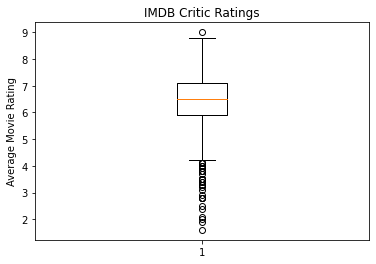

In [17]:
#creating boxplot for critic ratings
imdb = cleaned_df["IMDB Rating"]
fig1, ax1 = plt.subplots()
ax1.set_title('IMDB Critic Ratings')
ax1.set_ylabel('Average Movie Rating')
imdb_box = ax1.boxplot(imdb)
imdb_box

In [18]:
quartiles = imdb.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of IMDB rating is: {lowerq}")
print(f"The upper quartile of IMDB rating is: {upperq}")
print(f"The interquartile range of IMDB rating is: {iqr}")
print(f"The the median of IMDB rating is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of IMDB rating is: 5.9
The upper quartile of IMDB rating is: 7.1
The interquartile range of IMDB rating is: 1.1999999999999993
The the median of IMDB rating is: 6.5 
Values below 4.100000000000001 could be outliers.
Values above 8.899999999999999 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f897710f0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f897710f760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8977102d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f897710fe20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f897711a160>],
 'means': []}

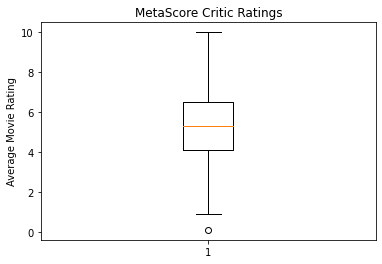

In [19]:
#creating boxplot for critic ratings
mscore = cleaned_df["MetaScore"]
fig2, ax2 = plt.subplots()
ax2.set_title('MetaScore Critic Ratings')
ax2.set_ylabel('Average Movie Rating')
meta_box = ax2.boxplot(mscore)
meta_box

In [20]:
quartiles = mscore.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of MetaScore rating is: {lowerq}")
print(f"The upper quartile of MetaScore rating is: {upperq}")
print(f"The interquartile range of MetaScore rating is: {iqr}")
print(f"The the median of MetaScore rating is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of MetaScore rating is: 4.1
The upper quartile of MetaScore rating is: 6.5
The interquartile range of MetaScore rating is: 2.4000000000000004
The the median of MetaScore rating is: 5.3 
Values below 0.4999999999999991 could be outliers.
Values above 10.100000000000001 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8977164bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f89771e52b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8977164850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f89771e5970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f89771e5c70>],
 'means': []}

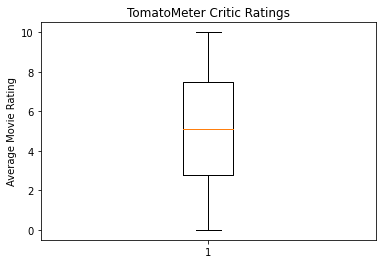

In [21]:
#creating boxplot for tomatoMeter ratings
tmeter = cleaned_df["TomatoMeter"]
fig3, ax3 = plt.subplots()
ax3.set_title('TomatoMeter Critic Ratings')
ax3.set_ylabel('Average Movie Rating')
t_box = ax3.boxplot(tmeter)
t_box

In [22]:
quartiles = tmeter.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of TomatoMeter rating is: {lowerq}")
print(f"The upper quartile of TomatoMeter rating is: {upperq}")
print(f"The interquartile range of TomatoMeter rating is: {iqr}")
print(f"The the median of TomatoMeter rating is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of TomatoMeter rating is: 2.8000000000000003
The upper quartile of TomatoMeter rating is: 7.5
The interquartile range of TomatoMeter rating is: 4.699999999999999
The the median of TomatoMeter rating is: 5.1000000000000005 
Values below -4.249999999999998 could be outliers.
Values above 14.549999999999999 could be outliers.


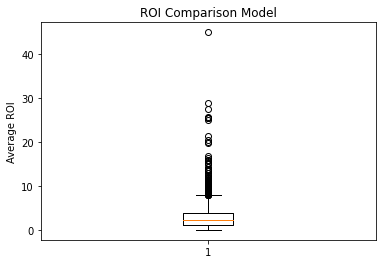

In [24]:
#creating boxplot for tomatoMeter ratings
fig4, ax4 = plt.subplots()
ax4.set_title('ROI Comparison Model')
ax4.set_ylabel('Average ROI')
ax4.boxplot(roi_rate)

plt.savefig("Project Images - Jeff/ROI_comp_model.png")

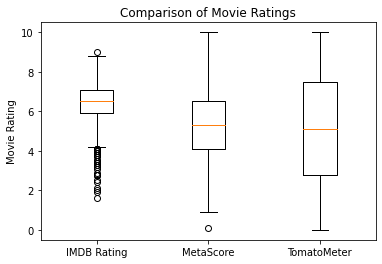

In [25]:
#combine boxplots to compare critic ratings 
labels = ["IMDB Rating", "MetaScore", "TomatoMeter"]
data = (imdb_rating, mscore, tmeter)
plt.title("Comparison of Movie Ratings")
plt.ylabel("Movie Rating")
plt.boxplot(data,labels =labels)

plt.savefig("Project Images - Jeff/3Critic_comp_model.png")

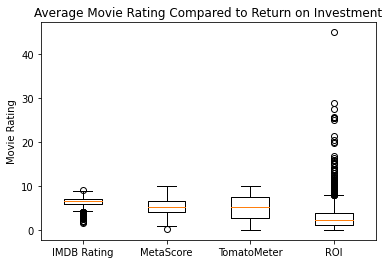

In [26]:
#combine boxplots to compare critic ratings and return on Investment
labels = ["IMDB Rating", "MetaScore", "TomatoMeter", "ROI"]
data = (imdb_rating, mscore, tmeter, roi_rate)
plt.title("Average Movie Rating Compared to Return on Investment")
plt.ylabel("Movie Rating")
plt.boxplot(data,labels =labels)

plt.savefig("Project Images - Jeff/3Critic_toROI_model.png")